# 14주 2강 Regression in General

Allen B. Downey의 http://thinkstats2.com 코드를 참조했습니다.

이번 강의는 일반적인 Regression에 대해서 배우겠습니다.

## Multiple Regression and statsmodels

In [1]:
import numpy as np
import pandas as pd
import random
from matplotlib import pyplot as plt

import statsmodels.formula.api as smf
# 처음으로 statsmodels 를 써 봅니다!


In [2]:
preg = pd.read_csv("./2002FemPreg.tsv", sep = "\t")
live = preg[preg.outcome == 1].dropna(subset=["agepreg", "totalwgt_lb"])
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]
ages = live.agepreg
weights = live.totalwgt_lb

In [3]:
formula = 'totalwgt_lb ~ agepreg' 
# statsmodels는 formula를 string을 통해서 입력받습니다.
# R 언어에서 많이 쓰는 방식이라 R-style formula라고 부르기도 합니다.
# 종속변수 ~ 독립변수(들의) 함수 형태로 쓰시면 됩니다.
model = smf.ols(formula, data=live)
results = model.fit()
results.summary()

# OLS: ordinary least squares 입니다

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            totalwgt_lb   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     43.02
Date:                Mon, 30 Nov 2020   Prob (F-statistic):           5.72e-11
Time:                        23:07:01   Log-Likelihood:                -15897.
No. Observations:                9038   AIC:                         3.180e+04
Df Residuals:                    9036   BIC:                         3.181e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.8304      0.068    100.470      0.000       6.697       6.964
agepreg        0.0175      0.003      6.559      0.000       0.012       0.023
==============================================================================
Omnibus:                     1024.052   Durbin-Watson:                   1.618
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3081.833
Skew:                          -0.601   Prob(JB):                         0.00
Kurtosis:                       5.596   Cond. No.                         118.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [4]:
inter = results.params['Intercept']
slope = results.params['agepreg']
inter, slope

(6.830396973311053, 0.017453851471802936)

In [5]:
# 지난주에 했던 Least Squares를 다시 불러와봅시다.
def LeastSquares(xs, ys):
    meanx = np.mean(xs)
    varx = np.var(xs)
    meany = np.mean(ys)
    cov = np.cov(xs, ys)
    
    slope = cov[0, 1] / varx # 지난 시간 강의를 참조하세요
    inter = meany - slope * meanx
    return inter, slope

# 실제로 절편(intercept)과 기울기(slope)를 구해봅시다
inter, slope = LeastSquares(ages, weights)
inter, slope

(6.830348812252711, 0.017455782848528653)

In [6]:
# p-value는 아래와 같이 조회할 수 있습니다. 
slope_pvalue = results.pvalues['agepreg']
slope_pvalue

5.7229471073120605e-11

In [7]:
# 결정 계수 (R^2) 도 아래처럼 조회할 수 있습니다.
results.rsquared

0.004738115474710369

In [8]:
# 첫 아이와 다른 아이들의 무게 차이를 봅시다.
diff_weight = firsts.totalwgt_lb.mean() - others.totalwgt_lb.mean()
diff_weight

-0.12476118453549034

In [9]:
# 첫 아이와 나머지 아이를 나을 때 부모의 나이는 얼마나 다를까요?
diff_age = firsts.agepreg.mean() - others.agepreg.mean()
diff_age

-3.558721516986065

In [10]:
# 첫 아이 출산의 평균 나이와, 나이가 증가함에 따라 생기는 변화량을 봅시다.
# 사실 이것 만으로도 첫아이와 나머지 아이들의 무게 차이가 어느정도 설명이 됩니다.
# 대략적으로 절반정도의 효과가 있는 것이 보이네요
slope * diff_age

-0.062120270018895224

In [11]:
# 실제로 category data를 fitting해서 첫 아이의 무게가 더 무거운지 볼까요? 
live['isfirst'] = live.birthord == 1
formula = 'totalwgt_lb ~ isfirst'
results = smf.ols(formula, data=live).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            totalwgt_lb   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     17.74
Date:                Mon, 30 Nov 2020   Prob (F-statistic):           2.55e-05
Time:                        23:07:01   Log-Likelihood:                -15909.
No. Observations:                9038   AIC:                         3.182e+04
Df Residuals:                    9036   BIC:                         3.184e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           7.3259      0.021    356.007      0.000       7.286       7.366
isfirst[T.True]    -0.1248      0.030     -4.212      0.000      -0.183      -0.067
==============================================================================
Omnibus:                      988.919   Durbin-Watson:                   1.613
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2897.107
Skew:                          -0.589   Prob(JB):                         0.00
Kurtosis:                       5.511   Cond. No.                         2.58
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
# 실제로 negative 관계가 보이네요. 
# 실제로는 산모의 나이와 첫아이 여부 두 가지가 다 연관을 줄지도 모릅니다.
# 두가지를 다 고려한 모델을 생각해 봅시다.

formula = 'totalwgt_lb ~ isfirst + agepreg'
results = smf.ols(formula, data=live).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            totalwgt_lb   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     24.02
Date:                Mon, 30 Nov 2020   Prob (F-statistic):           3.95e-11
Time:                        23:07:01   Log-Likelihood:                -15894.
No. Observations:                9038   AIC:                         3.179e+04
Df Residuals:                    9035   BIC:                         3.182e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           6.9142      0.078     89.073      0.000       6.762       7.066
isfirst[T.True]    -0.0698      0.031     -2.236      0.025      -0.131      -0.009
agepreg             0.0154      0.003      5.499      0.000       0.010       0.021
==============================================================================
Omnibus:                     1019.945   Durbin-Watson:                   1.618
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3063.682
Skew:                          -0.599   Prob(JB):                         0.00
Kurtosis:                       5.588   Cond. No.                         137.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

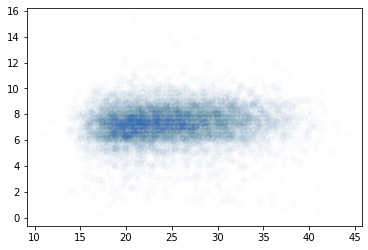

In [13]:
# 위에서 추정한 대로, 기울기가 -0.1248에서 -0.0698정도로 대략 반으로 줄어들었습니다.
# 즉, 산모의 나이를 보정하면 첫 아이의 무게 차이가 반으로 줄어든다는 것입니다. 
# 만약 산모 나이와 무게의 관계가 non-linear라면 어떨까요?

plt.scatter(live['agepreg'], live['totalwgt_lb'], alpha=0.01)

In [14]:
live['agepreg2'] = live.agepreg**2
formula = 'totalwgt_lb ~ isfirst + agepreg2'
results = smf.ols(formula, data=live).fit()
results.summary()

# 단순히 제곱 함수는 효과가 더 적은 것 같습니다. 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            totalwgt_lb   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     20.83
Date:                Mon, 30 Nov 2020   Prob (F-statistic):           9.47e-10
Time:                        23:07:01   Log-Likelihood:                -15897.
No. Observations:                9038   AIC:                         3.180e+04
Df Residuals:                    9035   BIC:                         3.182e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           7.1346      0.044    161.376      0.000       7.048       7.221
isfirst[T.True]    -0.0790      0.031     -2.548      0.011      -0.140      -0.018
agepreg2            0.0003   5.31e-05      4.885      0.000       0.000       0.000
==============================================================================
Omnibus:                     1018.067   Durbin-Watson:                   1.618
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3052.103
Skew:                          -0.599   Prob(JB):                         0.00
Kurtosis:                       5.583   Cond. No.                     2.37e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.37e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
formula = 'totalwgt_lb ~ isfirst + np.power(agepreg, 2)'
# 함수로 formula를 입력할 수도 있습니다
results = smf.ols(formula, data=live).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            totalwgt_lb   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     20.83
Date:                Mon, 30 Nov 2020   Prob (F-statistic):           9.47e-10
Time:                        23:07:01   Log-Likelihood:                -15897.
No. Observations:                9038   AIC:                         3.180e+04
Df Residuals:                    9035   BIC:                         3.182e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                7.1346      0.044    161.376      0.000       7.048       7.221
isfirst[T.True]         -0.0790      0.031     -2.548      0.011      -0.140      -0.018
np.power(agepreg, 2)     0.0003   5.31e-05      4.885      0.000       0.000       0.000
==============================================================================
Omnibus:                     1018.067   Durbin-Watson:                   1.618
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3052.103
Skew:                          -0.599   Prob(JB):                         0.00
Kurtosis:                       5.583   Cond. No.                     2.37e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.37e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
formula = 'totalwgt_lb ~ isfirst + agepreg + agepreg2'
results = smf.ols(formula, data=live).fit()
results.summary()

# 하지만 나이와 나이 제곱을 모두 고려하면 효과가 더 큽니다.
# 이러한 결과들을 통해, 첫 아이와 다른 아이의 무게는 최소한 어느 정도는 나이의 영향이
# 있다고 볼 수 있지요.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            totalwgt_lb   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     22.64
Date:                Mon, 30 Nov 2020   Prob (F-statistic):           1.35e-14
Time:                        23:07:01   Log-Likelihood:                -15884.
No. Observations:                9038   AIC:                         3.178e+04
Df Residuals:                    9034   BIC:                         3.181e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           5.6923      0.286     19.937      0.000       5.133       6.252
isfirst[T.True]    -0.0504      0.031     -1.602      0.109      -0.112       0.011
agepreg             0.1124      0.022      5.113      0.000       0.069       0.155
agepreg2           -0.0018      0.000     -4.447      0.000      -0.003      -0.001
==============================================================================
Omnibus:                     1007.149   Durbin-Watson:                   1.616
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3003.343
Skew:                          -0.594   Prob(JB):                         0.00
Kurtosis:                       5.562   Cond. No.                     1.39e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Data Mining
임신 연령과 어떤 정보를 결합했을 때 가장 태아의 무게를 잘 설명할 수 있을까요?
오래간만에 FemResp 데이터를 불러와봅시다.

In [17]:
live = live[live.prglngth>30]
resp = pd.read_csv("./2002FemResp.tsv", sep = "\t")
resp.index = resp.caseid
join = live.join(resp, on='caseid', rsuffix='_r')
# merge를 써도 됩니다. 

In [18]:
join

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,pubassis_i_r,basewgt_r,adj_mod_basewgt_r,finalwgt_r,secu_r,sest_r,cmintvw_r,cmlstyr,screentime,intvlngth
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,3410.389399,3869.349602,6448.271112,2,9,1231,1219,19:56:43,67.563833
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,3410.389399,3869.349602,6448.271112,2,9,1231,1219,19:56:43,67.563833
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,7226.301740,8567.549110,12999.542264,2,12,1231,1219,14:54:03,106.018167
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,7226.301740,8567.549110,12999.542264,2,12,1231,1219,14:54:03,106.018167
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,7226.301740,8567.549110,12999.542264,2,12,1231,1219,14:54:03,106.018167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13581,12568,2,NaN,NaN,NaN,NaN,5.0,NaN,1.0,NaN,...,0,2734.687353,4258.980140,7772.212858,2,28,1234,1222,18:45:21,137.759500
13584,12569,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,2580.967613,2925.167116,5075.164946,2,61,1234,1222,14:29:54,70.267000
13588,12571,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,4670.540953,5795.692880,6269.200989,1,78,1227,1215,11:21:29,109.983667
13591,12571,4,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,4670.540953,5795.692880,6269.200989,1,78,1227,1215,11:21:29,109.983667


In [19]:
def GoMining(df):
    variables = []
    for name in df.columns:
        try:
            if df[name].var() < 1e-7:
                continue
            # 데이터가 거의 변하지 않는 경우 (variance가 매우 작은 경우) 테스트하지 않습니다
            formula = 'totalwgt_lb ~ agepreg + ' + name
            # input 2개의 선형 함수를 가정합니다.
            model = smf.ols(formula, data=df)
            if model.nobs < len(df)/2:
                # 데이터가 반 이하에만 있는 경우 무시합니다. 
                continue
            results = model.fit()
        except (ValueError, TypeError):
            continue
        variables.append((results.rsquared, name))
    return variables

In [20]:
variables = GoMining(join)

In [21]:
sorted(variables, reverse=True)[0:30]
# 일부는 prediction용으론 좋지 않습니다. 출산 이후에 잴 수 있기 때문이죠.
# 아래 correlation이 높은 것 들중, 출산 전에 미리 말 수 있는 것들만 골라봅시다.

[(1.0, 'totalwgt_lb'),
 (0.9498127305978009, 'birthwgt_lb'),
 (0.3008240784470769, 'lbw1'),
 (0.13012519488625063, 'prglngth'),
 (0.12340041363361076, 'wksgest'),
 (0.10203149928156063, 'agecon'),
 (0.027144274639579913, 'mosgest'),
 (0.01855092529394209, 'babysex'),
 (0.016199503586252995, 'race_r'),
 (0.016199503586252995, 'race'),
 (0.016017752709788113, 'nbrnaliv'),
 (0.01400379557811493, 'paydu'),
 (0.013430066465713209, 'rmarout03'),
 (0.013102457615706053, 'birthwgt_oz'),
 (0.012529022541810764, 'anynurse'),
 (0.012193688404495862, 'bfeedwks'),
 (0.011870069031173491, 'totincr'),
 (0.011807801994374811, 'marout03'),
 (0.011752599354395876, 'marcon03'),
 (0.011437770919636825, 'cebow'),
 (0.011407737138640295, 'rmarout01'),
 (0.011354138472805642, 'rmarout6'),
 (0.011269357246806444, 'marout01'),
 (0.011238349302030937, 'hisprace_r'),
 (0.011238349302030937, 'hisprace'),
 (0.010961563590751733, 'mar1diss'),
 (0.0106049646842995, 'fmarcon5'),
 (0.010546913206565312, 'rmarout02'),


In [22]:
formula = ('totalwgt_lb ~ agepreg + C(race) + babysex==1 + '
               'nbrnaliv>1 + paydu==1 + totincr')
# Category 변수는 C를 써 줍니다.
# 논리식을 쓰면 True와 False 두 가지의 category로 나옵니다.
# babysex: 아이의 성별, race: 산모 인종, nbraliv: 이번에 임신된 아이수 (쌍둥이 여부)
# paydu: 현재 거주중인 집의 소유주 (1: 본인 혹은 가족, 2: 렌트)
# totalincr: 가족의 총 소득
results = smf.ols(formula, data=join).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            totalwgt_lb   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     79.98
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          4.86e-113
Time:                        23:07:27   Log-Likelihood:                -14295.
No. Observations:                8781   AIC:                         2.861e+04
Df Residuals:                    8773   BIC:                         2.866e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                6.6303      0.065    102.223      0.000       6.503       6.757
C(race)[T.2]             0.3570      0.032     11.215      0.000       0.295       0.419
C(race)[T.3]             0.2665      0.051      5.175      0.000       0.166       0.367
babysex == 1[T.True]     0.2952      0.026     11.216      0.000       0.244       0.347
nbrnaliv > 1[T.True]    -1.3783      0.108    -12.771      0.000      -1.590      -1.167
paydu == 1[T.True]       0.1196      0.031      3.861      0.000       0.059       0.180
agepreg                  0.0074      0.003      2.921      0.004       0.002       0.012
totincr                  0.0122      0.004      3.110      0.002       0.005       0.020
==============================================================================
Omnibus:                      398.813   Durbin-Watson:                   1.604
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1388.362
Skew:                          -0.037   Prob(JB):                    3.32e-302
Kurtosis:                       4.947   Cond. No.                         221.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
# 위 데이터들을 합치니 훨씬 더 예측이 잘 되는 것 같습니다.

## Excercises

**Excercise** Trivers-Willard 가설은 많은 포유류의 경우 성비가 어머니의 나이, 크기, 건강 및 사회적 지위와 같은 것에 따라 달라진다는 가설입니다. https://en.wikipedia.org/wiki/Trivers-Willard_hypothesis

일부 연구에서는 인간에게 이러한 효과가 나타 났지만 결과는 엇갈립니다. 이 장에서 우리는 이러한 요인과 관련된 몇 가지 변수를 테스트했지만 성비에 통계적으로 유의 한 영향을 미치는 변수를 찾지 못했습니다.

연습으로 데이터 마이닝 접근 방식을 사용하여 임신 및 응답자 파일의 다른 변수를 테스트합니다. 상당한 효과가있는 요인을 찾을 수 있습니까?

In [24]:
# Solution goes here
live = live[live.prglngth>30]
resp = pd.read_csv("./2002FemResp.tsv", sep = "\t")
resp.index = resp.caseid
join = live.join(resp, on='caseid', rsuffix='_r')
# merge를 써도 됩니다. 

In [25]:
# Solution goes here
def GoMining2(df):

SyntaxError: unexpected EOF while parsing (<ipython-input-25-4cf45c32ca4d>, line 2)

In [ ]:
# Solution goes here
variables = GoMining2(join)

In [ ]:
# Solution goes here
sorted(variables, reverse=True)[0:30]